<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%BB%A4%ED%94%BC%EC%A0%84%EB%AC%B8%EC%A0%90_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%B6%94%EA%B0%80%EC%A0%95%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추가적인 정보를 사용하여, 커피전문점의 매출액을 예측하여 봅시다.

## 1. 데이터를 불러오자

In [1]:
#copy.right Hongjai Rhee

## 필요한 라이브러리 불러오기
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals; import pathlib; import seaborn as sns 
from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import pandas as pd;  import numpy as np
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical; from matplotlib import style

## 데이터 불러오기  
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
dat = pd.read_csv('/content/public/coffee_seoul_pred.csv', encoding='cp949')
print(dat.head(10))    
   
# star=1 if 스타벅스,  lon=경도,  lat=위도,   d250=250미터 반경내 커피점 수,  d50=50미터 반경내 커피점 수,   land=공시지가 지표,   sales =월매출액(만원)
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=np.log(dat[:,-1]); ## 월매출은 로그 스케일로 변환
#print(x.shape, y.shape)

Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 64 (delta 22), reused 35 (delta 8), pack-reused 0
Unpacking objects: 100% (64/64), done.


# 네트워크 구조와 학습횟수를 정하자

In [0]:
## 학습 파라미터 설정
hidden_neuron=0      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=500; BATCH=32  ## 학습횟수 

# 학습을 실행한다

Train on 1189 samples, validate on 298 samples
Epoch 1/500
 - 0s - loss: 13776.3332 - mean_squared_error: 13776.3332 - val_loss: 12991.8845 - val_mean_squared_error: 12991.8845
Epoch 2/500
 - 0s - loss: 12314.2454 - mean_squared_error: 12314.2454 - val_loss: 11591.3170 - val_mean_squared_error: 11591.3170
Epoch 3/500
 - 0s - loss: 10969.3412 - mean_squared_error: 10969.3412 - val_loss: 10305.8897 - val_mean_squared_error: 10305.8897
Epoch 4/500
 - 0s - loss: 9735.3393 - mean_squared_error: 9735.3393 - val_loss: 9129.4111 - val_mean_squared_error: 9129.4111
Epoch 5/500
 - 0s - loss: 8610.0303 - mean_squared_error: 8610.0303 - val_loss: 8059.2305 - val_mean_squared_error: 8059.2305
Epoch 6/500
 - 0s - loss: 7587.8266 - mean_squared_error: 7587.8266 - val_loss: 7088.6888 - val_mean_squared_error: 7088.6888
Epoch 7/500
 - 0s - loss: 6662.1986 - mean_squared_error: 6662.1986 - val_loss: 6211.3719 - val_mean_squared_error: 6211.3719
Epoch 8/500
 - 0s - loss: 5826.7288 - mean_squared_error: 5

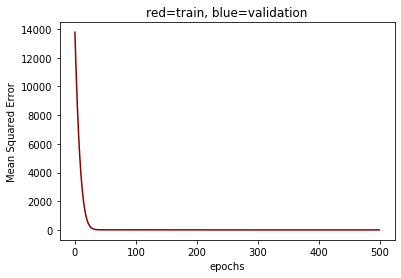

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


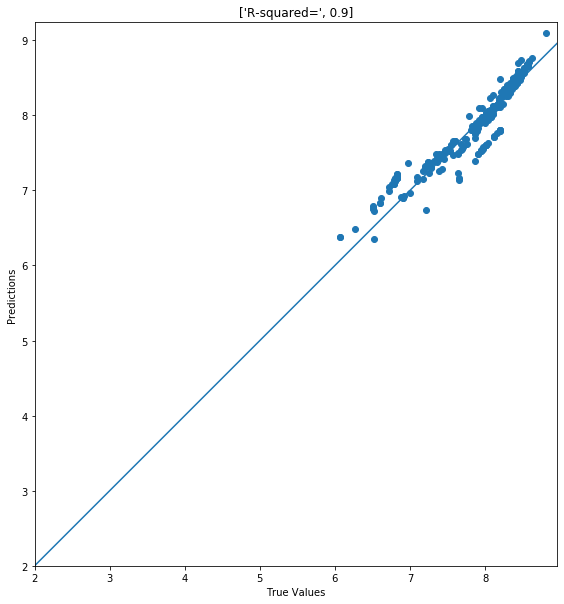

In [4]:


#### 이 아래는 자동으로 실행됨

## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(1, input_dim=x_train.shape[1]))   ## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(1)) ## 은닉층=1

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()

from sklearn.metrics import r2_score; import matplotlib.pyplot as plt


# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['mean_squared_error'], label='Training Mean Squared Error', color='darkred')
#plt.plot(range(EPOCH), hist.history['val_mean_squared_error'], label='Validation Mean Squared Error', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('Mean Squared Error'); plt.title('red=train, blue=validation'); plt.show()
model.summary()
pred_y = model.predict(x_test)

r2=r2_score(y_test, pred_y)

## 테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_y);plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["R-squared=", np.round(r2,3)])
plt.xlim([2,plt.xlim()[1]]);plt.ylim([2,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

**45도 선에 위치할수록 테스트셋에 대한 예측이 정확하게 된 것이**다



# 개점 예정인 새로운 커피전문점에 대한 월매출액을 예측하여 보자


In [5]:
# 6. 예측하기 
x_new= x_test[4:7]; print(np.round(x_new,2)); 
yhat = np.exp(model.predict(x_new))
print(np.round(yhat,2))
## EOF

[[  1.   127.16  37.55   3.     1.     0.6 ]
 [  1.   126.98  37.57   5.     1.     0.95]
 [  0.   126.8   37.57   1.     1.     0.2 ]]
[[2991.15]
 [4780.03]
 [1290.91]]


---
# 생각해보기
특성변수(X)를 고를때 경제학적 이론이 도움이 될 수 있다. 이것은 아직 로봇의 영역이 아닌듯..
?
